In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geojson
import folium

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df = pd.read_csv('input.csv',
    skiprows=4,
    dtype={
    'REFERENCE': str,
    'PLACENAME': str,
    'DESIGNATION': str,
    'STATUS': str,
    'DUAL NAME': str,
    'GAZETTE DATE': str,
    'GEOGRAPHICAL NAME': str,
    'PREVIOUS NAMES': str,
    'GNB FILE': str,
    'LGA': str,
    'LGA AT GAZETTAL': str,
    '1:25,000 MAP NAME': str,
    '1:100,000 MAP': str,
    'PARISH': str,
    'COUNTY': str,
    'DESCRIPTION': str,
    'MEANING': str,
    'ORIGIN': str,
    'HISTORY': str,
    'PRONUNCIATION': str,
    'ABORIGINAL NAME': str,
    'GDA2020 LAT': float })

pd.set_option('display.max_columns', None)
df.head()

,REFERENCE,PLACENAME,DESIGNATION,STATUS,DUAL NAME,GAZETTE DATE,GEOGRAPHICAL NAME,PREVIOUS NAMES,GNB FILE,LGA,LGA AT GAZETTAL,GDA2020 LAT,GDA2020 LONG,"1:25,000 MAP NAME","1:100,000 MAP",PARISH,COUNTY,DESCRIPTION,MEANING,ORIGIN,HISTORY,PRONUNCIATION,ABORIGINAL NAME
0,NaN,12 Mile Dam,TANK,Official Recorded,NaN,21st December 1990,NaN,NaN,3268,BOGAN,BOGAN,-32.123384,146.673461,BOBADAH,BOBADAH 8233,NaN,FLINDERS,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,16 Mile Gum Tank Govt Tank,TANK,Variant,NaN,NaN,Sixteen Mile Gums Tank,NaN,NaN,NaN,NaN,-34.765129,144.767944,NaN,HAY 7828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1st Branch Creek,CREEK,Variant,NaN,NaN,Wattle Point Creek,NaN,NaN,NaN,NaN,-29.215068,152.651086,NaN,COALDALE 9439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,20 Mile Hollow,RURAL PLACE,Discontinued,NaN,24th July 1970,NaN,NaN,8930,BLUE MOUNTAINS,BLUE MOUNTAINS,-33.731751,150.484505,KATOOMBA,KATOOMBA 8930,WOODFORD,COOK,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2nd Branch of Josephs Creek,CREEK,Variant,NaN,NaN,Mays Camp Creek,NaN,NaN,NaN,NaN,-29.215068,152.667753,NaN,COALDALE 9439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
aboriginal_places = df.loc[df['ABORIGINAL NAME'] == 'Yes']
aboriginal_places.head()

,REFERENCE,PLACENAME,DESIGNATION,STATUS,DUAL NAME,GAZETTE DATE,GEOGRAPHICAL NAME,PREVIOUS NAMES,GNB FILE,LGA,LGA AT GAZETTAL,GDA2020 LAT,GDA2020 LONG,"1:25,000 MAP NAME","1:100,000 MAP",PARISH,COUNTY,DESCRIPTION,MEANING,ORIGIN,HISTORY,PRONUNCIATION,ABORIGINAL NAME
1602,NaN,Aunty Mary Hooker Rest Area,RESERVE,Rejected,NaN,NaN,NaN,NaN,6091,MID-WESTERN REGIONAL,MID-WESTERN REGIONAL,-32.797679,149.798407,Kandos,Mudgee 8832,Tannabutta,Wellington,Roadside Rest Area at 9176 Castlereagh Highway...,NaN,Aunty Mary Hooker was a proud Biripi / Bundjal...,NaN,NaN,Yes
1736,NaN,Baayay Girrawiiny,PICNIC AREA,Recommendation With Minister,NaN,NaN,NaN,NaN,GNB 6205,PARKES,PARKES,-33.107115,147.803273,Bogan Gate,Bogan Gate 8431,Gunningbland,Cunningham,"The site is located on Hutton Street, Bogan Ga...","Baayay - meeting place of two parities, a trys...",The proposed name seeks to acknowledge that th...,NaN,NaN,Yes
2091,NaN,Badagarang,SUBURB,Official Assigned,NaN,24th February 2023,NaN,NaN,3653,SHOALHAVEN,SHOALHAVEN,-34.831207,150.573967,Berry,NaN,Bunberra; Illaroo,Camden,An address locality within Shoalhaven Local Go...,NaN,"From the local Aboriginal language group, Dhar...",NaN,Bada-garang,Yes
2145,NaN,Badu Narang,GULLY,Dual - Official Assigned,Bardenarang Gully,24th June 2022,NaN,NaN,6159,HAWKESBURY,HAWKESBURY,-33.575700,150.853036,Wilberforce,Penrith 9030,Pitt Town,Cumberland,A creek running north from Pitt Town Lagoon in...,Small freshwater source,Badu Narang was the name given by Darug people...,NaN,Badu Narang,Yes
2302,NaN,Balawan,MOUNTAIN,Dual - Official Assigned,Mount Imlay,18th July 2014,Mount Imlay,NaN,NaN,BEGA VALLEY,BEGA VALLEY,-37.180366,149.734218,MOUNT IMLAY,EDEN 8823,STURT,AUCKLAND,A mountain about 10 km S by E of Village of To...,NaN,NaN,NaN,NaN,Yes


In [4]:
meaning_places = df[df['MEANING'].str.contains('aboriginal', case=False, na=False)]
meaning_places.head()

,REFERENCE,PLACENAME,DESIGNATION,STATUS,DUAL NAME,GAZETTE DATE,GEOGRAPHICAL NAME,PREVIOUS NAMES,GNB FILE,LGA,LGA AT GAZETTAL,GDA2020 LAT,GDA2020 LONG,"1:25,000 MAP NAME","1:100,000 MAP",PARISH,COUNTY,DESCRIPTION,MEANING,ORIGIN,HISTORY,PRONUNCIATION,ABORIGINAL NAME
233,NaN,Adelong,TOWN,Official Assigned,NaN,17th May 1996; 22nd July 1977; 31st August 2001,NaN,NaN,4780/150,SNOWY VALLEYS,TUMUT,-35.298436,148.051229,TUMUT,TUMUT 8527,ADELONG,WYNYARD,A town located about 15 km W of Tumut and abou...,Said to be derived from the Aboriginal meaning...,Aboriginal.,Adelong was the centre of an immensely rich go...,NaN,NaN
235,NaN,Adelong,LOCALITY,Official Assigned,NaN,9th April 1999; 31st August 2001,NaN,NaN,3809,SNOWY VALLEYS,TUMUT,-35.304840,148.068993,TUMUT,TUMUT 8527,ADELONG,WYNYARD,An Address Locality Boundaries within the Tumu...,Said to be derived from the Aboriginal meaning...,Aboriginal.,Adelong was the centre of an immensely rich go...,NaN,NaN
490,NaN,Algona Creek,CREEK,Official Assigned,NaN,17th March 1967,NaN,NaN,NaN,TAMWORTH REGIONAL,TAMWORTH REGIONAL,-31.315076,150.984466,GOONOO GOONOO,NUNDLE 9135; TAMWORTH 9035,PEEL RIVER CO ESTATE,PARRY,Non-perennial stream joining Spring Creek near...,An Aboriginal word. Ingamells gives:- ALGONA (...,The name is found within the subdivision of `G...,MAPS. The name is not on the county map. There...,NaN,NaN
700,NaN,Amaroo Flora Reserve,RESERVE,Discontinued,NaN,12th February 1988; 14th November 2003,NaN,NaN,2993,TWEED,TWEED,-28.381732,153.234404,BRAYS CREEK,MURWILLUMBAH 9541,BURRELL,ROUS,A reserve within Wollumbin State Forest about ...,A lovely place'. A W Reed - Aboriginal Place N...,Aboriginal,NaN,NaN,NaN
850,NaN,Anembo,LOCALITY,Official Assigned,NaN,3rd October 1969; 12th July 1996,NaN,NaN,3753,SNOWY MONARO REGIONAL,COOMA-MONARO,-35.815093,149.417880,JERANGLE,MICHELAGO 8726,MILFORD,BERESFORD,A locality situated E of Queanbeyan River abou...,Aboriginal: peaceful; quiet place. (Reed 1967),Aboriginal.,NaN,NaN,NaN


In [5]:
origin_places = df[df['ORIGIN'].str.contains('aboriginal', case=False, na=False)]
origin_places.head()

,REFERENCE,PLACENAME,DESIGNATION,STATUS,DUAL NAME,GAZETTE DATE,GEOGRAPHICAL NAME,PREVIOUS NAMES,GNB FILE,LGA,LGA AT GAZETTAL,GDA2020 LAT,GDA2020 LONG,"1:25,000 MAP NAME","1:100,000 MAP",PARISH,COUNTY,DESCRIPTION,MEANING,ORIGIN,HISTORY,PRONUNCIATION,ABORIGINAL NAME
21,NaN,Aarons Pass,SADDLE,Official Assigned,NaN,21st July 1978,NaN,NaN,5515,MID-WESTERN REGIONAL,MID-WESTERN REGIONAL,-32.865087,149.801170,KANDOS,MUDGEE 8832,TABRABUCCA,ROXBURGH,A saddle about 6 km E by N of Bombandi Hill an...,NaN,"In 1821, James Blackman and a small party set ...","Source: Aborigines of the Bathurst District, ...",NaN,NaN
170,NaN,Adaminaby,LOCALITY,Official Assigned,NaN,28th August 1981; 18th September 1992,NaN,Town of Adaminaby; Adamindumee,3702,SNOWY MONARO REGIONAL,SNOWY RIVER,-35.995656,148.774839,SHANNONS FLAT,BERRIDALE 8625; TANTANGARA 8626,BOLAIRA,WALLACE,A Locality on the Snowy Mountains Highway abou...,NaN,Aboriginal word meaning 'a camp or resting pla...,"The result of Kiandra gold rush in 1860, procl...",adda-min-abee,NaN
233,NaN,Adelong,TOWN,Official Assigned,NaN,17th May 1996; 22nd July 1977; 31st August 2001,NaN,NaN,4780/150,SNOWY VALLEYS,TUMUT,-35.298436,148.051229,TUMUT,TUMUT 8527,ADELONG,WYNYARD,A town located about 15 km W of Tumut and abou...,Said to be derived from the Aboriginal meaning...,Aboriginal.,Adelong was the centre of an immensely rich go...,NaN,NaN
235,NaN,Adelong,LOCALITY,Official Assigned,NaN,9th April 1999; 31st August 2001,NaN,NaN,3809,SNOWY VALLEYS,TUMUT,-35.304840,148.068993,TUMUT,TUMUT 8527,ADELONG,WYNYARD,An Address Locality Boundaries within the Tumu...,Said to be derived from the Aboriginal meaning...,Aboriginal.,Adelong was the centre of an immensely rich go...,NaN,NaN
255,NaN,Adjungbilly,VILLAGE,Official Assigned,NaN,23rd October 1970,NaN,NaN,NaN,COOTAMUNDRA-GUNDAGAI REGIONAL,GUNDAGAI,-35.081766,148.401218,TUMORRAMA,TUMUT 8527,ADJUNGBILLY,BUCCLEUCH,A village on bank of Adjungbilly Creek about 9...,Also: 'permanent stream'. (McCarthy; 1963).,"Aboriginal: originally Nadjongbilla, from nad...",NaN,NaN,NaN


In [6]:
first_nations_named_places = pd.concat([aboriginal_places, meaning_places, origin_places])
first_nations_named_places = first_nations_named_places.drop_duplicates()
status_count = first_nations_named_places.groupby(by="STATUS").size()
status_count = status_count.reset_index(name='COUNT')
status_count

,STATUS,COUNT
0,Abandoned,6
1,Applicant To Review Comments,2
2,Board To Consider,3
3,Board To Reconsider,1
4,Closed For Public Comment,2
5,Concurred,10
6,Deferred,15
7,Discontinued,34
8,Dual - Board To Consider,1
9,Dual - Closed For Public Comment,3


In [7]:
first_nations_named_places = first_nations_named_places[['PLACENAME', 'DESIGNATION', 'STATUS', 'DUAL NAME', 'MEANING', 'ORIGIN', 'GEOGRAPHICAL NAME', 'GDA2020 LAT', 'GDA2020 LONG']]
first_nations_named_places.dropna(subset=['GDA2020 LAT'], inplace=True)
first_nations_named_places = first_nations_named_places.query("STATUS.str.contains('Assigned')")

In [8]:
non_first_nations_named_places = df[df['STATUS'].str.contains('Assigned', na=False)]
non_first_nations_named_places = non_first_nations_named_places[non_first_nations_named_places['ABORIGINAL NAME'] != 'Yes']
non_first_nations_named_places.dropna(subset=['GDA2020 LAT'], inplace=True)

In [9]:
# Create GeoJSON files.
def create_geojson_string(dataframe):
    features = []
    for index, row in dataframe.iterrows():
        coordinates = geojson.Point((row['GDA2020 LONG'], row['GDA2020 LAT']))
        properties = dataframe.loc[index, ['PLACENAME', 'DESIGNATION', 'STATUS', 'DUAL NAME', 'MEANING', 
                                           'ORIGIN', 'GEOGRAPHICAL NAME', 'GDA2020 LAT', 'GDA2020 LONG']].to_dict()
        new_properties = {}
        for key, value in properties.items():
            if pd.isna(dataframe.at[index, key]): # Nan values will result in error when passed to GeoJSON.
                new_properties[key] = None
            else:
                new_properties[key] = value

        feature = geojson.Feature(geometry=coordinates, properties=new_properties)
        features.append(feature)
    feature_collection = geojson.FeatureCollection(features)
    geojson_string = geojson.dumps(feature_collection)
    return geojson_string

first_nations_geojson = create_geojson_string(first_nations_named_places)

In [12]:
# Create Folium map.
red_marker = folium.Marker(icon=folium.Icon(color="red", prefix='fa',icon='map-marker'))
m = folium.Map(location=[-31.575567970590456, 146.41701195],zoom_start=6)
folium.GeoJson(data=first_nations_geojson, name="Places with a name of First Nations origin",
               marker = red_marker,
              tooltip=folium.GeoJsonTooltip(fields=['PLACENAME', 'DESIGNATION', 'DUAL NAME',
                                                    'MEANING', 'ORIGIN',
                                                   'GEOGRAPHICAL NAME'])).add_to(m)
folium.LayerControl(collapsed=False).add_to(m)
m.save("NSW_geographical_places.html")

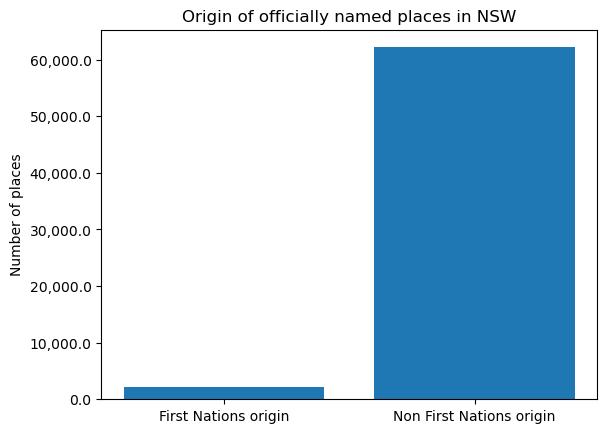

In [13]:
# Column chart.
first_nations_rows = len(first_nations_named_places)
non_first_nations_rows = len(non_first_nations_named_places)
data = [first_nations_rows, non_first_nations_rows]
labels = ['First Nations origin', 'Non First Nations origin']

plt.bar(labels, data)
plt.ylabel('Number of places')
plt.title('Origin of officially named places in NSW')
plt.gca().yaxis.set_major_formatter('{:,}'.format)
plt.show()